In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from xgboost import XGBRegressor

In [2]:
datasets = pd.read_csv("C:\\Users\\rahul\\OneDrive\\Desktop\\muskan\\datasets\\BostonHousing.csv")

In [3]:
datasets


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,price
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [4]:
datasets.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,price
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [5]:
datasets.shape

(506, 14)

In [6]:
datasets.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
price      0
dtype: int64

In [7]:
correlation = datasets.corr()

<Axes: >

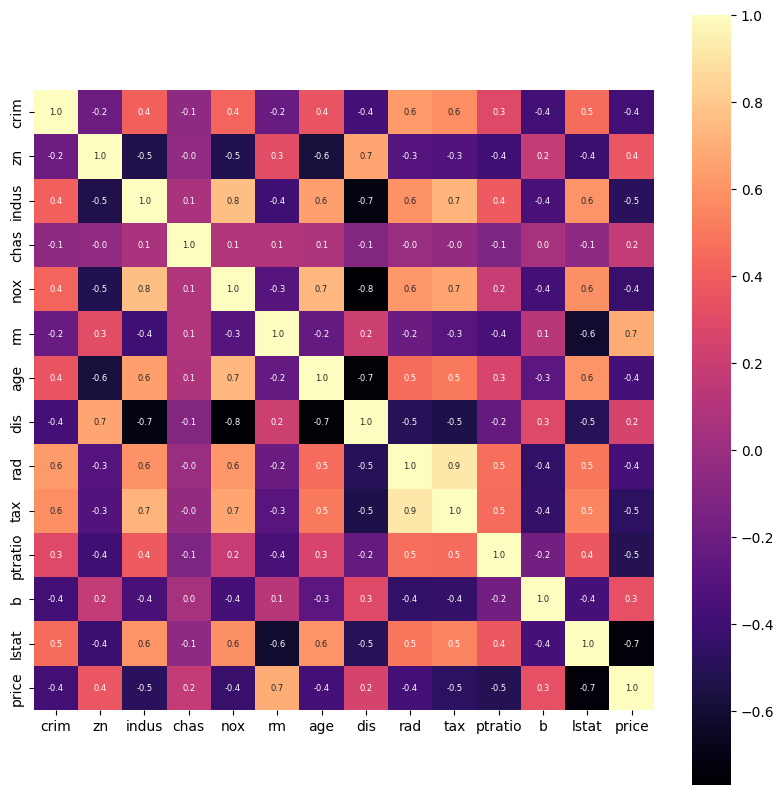

In [8]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar= True, square = True, fmt = '.1f',annot = True, annot_kws ={'size': 6}, cmap = "magma")

In [9]:
x = datasets.drop('price', axis = 1)
y = datasets['price']

In [10]:
x

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48


In [11]:
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: price, Length: 506, dtype: float64

In [12]:
x_train, x_test, y_train, y_test =  train_test_split(x,y, test_size = 0.2, random_state = 45)

In [13]:
print(x.shape, x_train.shape, x_test.shape)

(506, 13) (404, 13) (102, 13)


In [14]:
model = LinearRegression()

In [15]:
model.fit(x_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [16]:
model_prediction = model.predict(x_train)

In [17]:
model_prediction

array([19.73040908, 26.6605123 , 26.047258  , 22.48983068, 22.31417718,
       21.23719854, 13.41754368, 16.12627255, 23.7738518 , 10.86598388,
        8.94126318, 22.91271128, 25.64145987, 30.42001108, 14.53389385,
       12.91828368, 15.88138679, 38.39958023, 22.61205777, 21.91022943,
       27.07083412,  3.50507617, 26.44142124, 33.02748689, 19.93280674,
       32.70409438, 30.44479709, 13.9980704 , 23.14367192, 19.65850178,
       15.683036  , 19.33989164, 19.93830874, 18.86075049, 18.31520369,
       28.38900397, 29.36790182, 21.38209265, 33.97974814, 25.34929568,
       22.09217973, 19.84143496, 14.66008725, 21.92947909, 20.45928844,
       13.99625699, 16.42262875, 21.78643496, 32.51590862, 13.94302174,
       30.04226447, 28.53030336, 33.63050616,  6.30575605, 15.63549529,
       17.42228321, 21.52319791, 11.6653116 , 23.95481821, 22.07544337,
       21.88151443, 20.74985758, 25.03587258, 20.46146948, 21.04669486,
       33.31371496, 24.98204787, 23.95923438, 20.70879706, 25.33

In [18]:
score1 = metrics.r2_score(model_prediction, y_train)
print("R2 SCORE = ", score1)

R2 SCORE =  0.6462774990062807


In [19]:
score2 = metrics.mean_absolute_error(model_prediction, y_train)
print("Mean absolute error: ", score2)

Mean absolute error:  3.121975430785068


In [20]:
model2 = XGBRegressor()

In [21]:
model2.fit(x_train, y_train)

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [22]:
model_prediction = model2.predict(x_train)

In [23]:
model_prediction

array([24.299934 , 27.088005 , 23.78896  , 21.702658 , 25.024323 ,
       19.012663 , 13.095583 , 15.213228 , 24.4093   ,  6.312151 ,
        8.69907  , 24.379349 , 21.60722  , 36.98761  , 15.397736 ,
       13.591881 , 14.1092205, 44.806572 , 21.20237  , 21.375313 ,
       21.99968  ,  8.099158 , 24.79784  , 26.687042 , 27.495363 ,
       31.481312 , 32.90846  , 13.410803 , 26.400267 , 20.375723 ,
       18.383965 , 18.492474 , 20.474344 , 15.004505 , 14.240065 ,
       31.183533 , 23.611961 , 20.711843 , 35.40564  , 20.698265 ,
       20.603355 , 18.402145 , 13.103708 , 22.700981 , 21.091822 ,
       14.349054 , 17.501984 , 19.297281 , 50.004242 , 10.902335 ,
       30.517    , 33.396862 , 31.98428  , 10.477355 , 15.609808 ,
       15.082019 , 18.74265  , 11.991888 , 22.804844 , 26.59628  ,
       20.101738 , 21.793556 , 23.09183  , 20.402071 , 18.779491 ,
       28.53767  , 21.406404 , 19.146944 , 21.789507 , 23.310629 ,
       22.997032 , 24.480284 , 16.30223  , 23.897882 , 49.9871

In [24]:
score1 = metrics.r2_score(model_prediction, y_train)
print("R2 SCORE = ", score1)

R2 SCORE =  0.9999967857948969


In [25]:
score2 = metrics.mean_absolute_error(model_prediction, y_train)
print("Mean absolute error: ", score2)

Mean absolute error:  0.011085945544856696


In [26]:
input = np.array([[0.06905 ,0.0	,2.18	,0	,0.458	,7.147	,54.2	,6.0622	,3	,222	,18.7	,396.90	,5.33	]])
model2.predict(input)

array([34.38907], dtype=float32)

In [27]:
input = np.array([[0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03]])
model2.predict(input)

array([34.70137], dtype=float32)

In [28]:
import pickle
pickle.dump(model2, open("house_price_prediction_model2.pkl", "wb"))

In [29]:
input = np.array([[0.03768,80,1.52,0,0.404,7.274,38.3,7.309,2,329,12.6,392.2,6.62]])
model2.predict(input)

array([34.594875], dtype=float32)